<a href="https://colab.research.google.com/github/ShariqZahid/Szahid/blob/main/My_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.


# **GitHub Link -**

https://github.com/ShariqZahid/Szahid.git

# **Problem Statement**


Analyzing key factors responsible for app engagement and success is very crucial for the developers creating apps and listing them on Playstore.

The Playstore apps has enormous potential to drive app-making businesses to success. Actionable insigths can be drawn for developers to work on and capture the Android market.

Various insights like the type of app and category of app most popular among users can be drawn. Features in the app which is increasing user engagement. Also, the whitespaces and pain points that users are facing in those existing apps and ways to tackle those whitespaces in new apps can be extracted.


#### **Define Your Business Objective?**

Key Factors Responsile for App Engagement and Success


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset Loading

In [3]:
# Load Dataset
path ='/content/drive/MyDrive/EDA Project/'
ps_df = pd.read_csv(path+"Play Store Data.csv")
ur_df = pd.read_csv(path+"User Reviews.csv")

### Dataset First View

In [4]:
# Dataset first look
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# dataset first look
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
ps_df.shape

(10841, 13)

In [7]:
ur_df.shape

(64295, 5)

### Dataset Information

In [8]:
# Dataset Info
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# Dataset Info
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
duplicates = ps_df[ps_df.duplicated()]
duplicates_count = len(duplicates)
duplicates_count

483

In [11]:
non_duplicates_count = len(ps_df) - duplicates_count
non_duplicates_count

10358

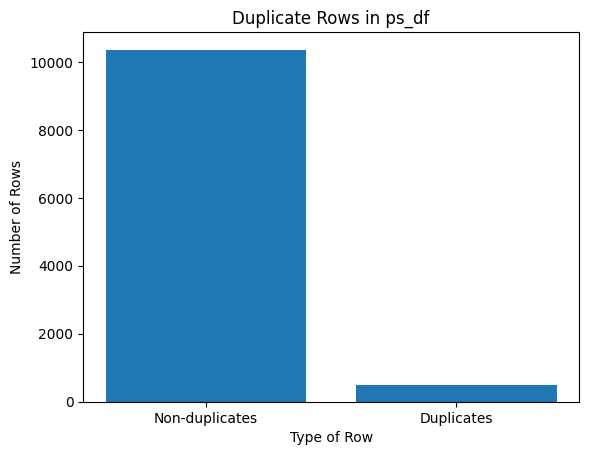

In [12]:
# Duplicates and Non-Duplicates visualization
plt.bar(['Non-duplicates', 'Duplicates'], [non_duplicates_count, duplicates_count])
plt.xlabel('Type of Row')
plt.ylabel('Number of Rows')
plt.title('Duplicate Rows in ps_df')
plt.show()

In [13]:
# Dataset Duplicate Value Count
dup_count = len(ur_df[ur_df.duplicated()])
dup_count

33616

In [14]:
non_dup_count = len(ur_df) - dup_count
non_dup_count

30679

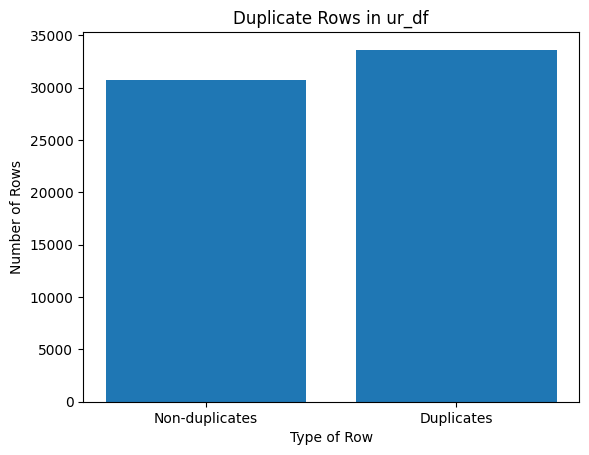

In [15]:
# Duplicates and Non-Duplicates visualization
plt.bar(['Non-duplicates', 'Duplicates'], [non_dup_count, dup_count])
plt.xlabel('Type of Row')
plt.ylabel('Number of Rows')
plt.title('Duplicate Rows in ur_df')
plt.show()

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: >

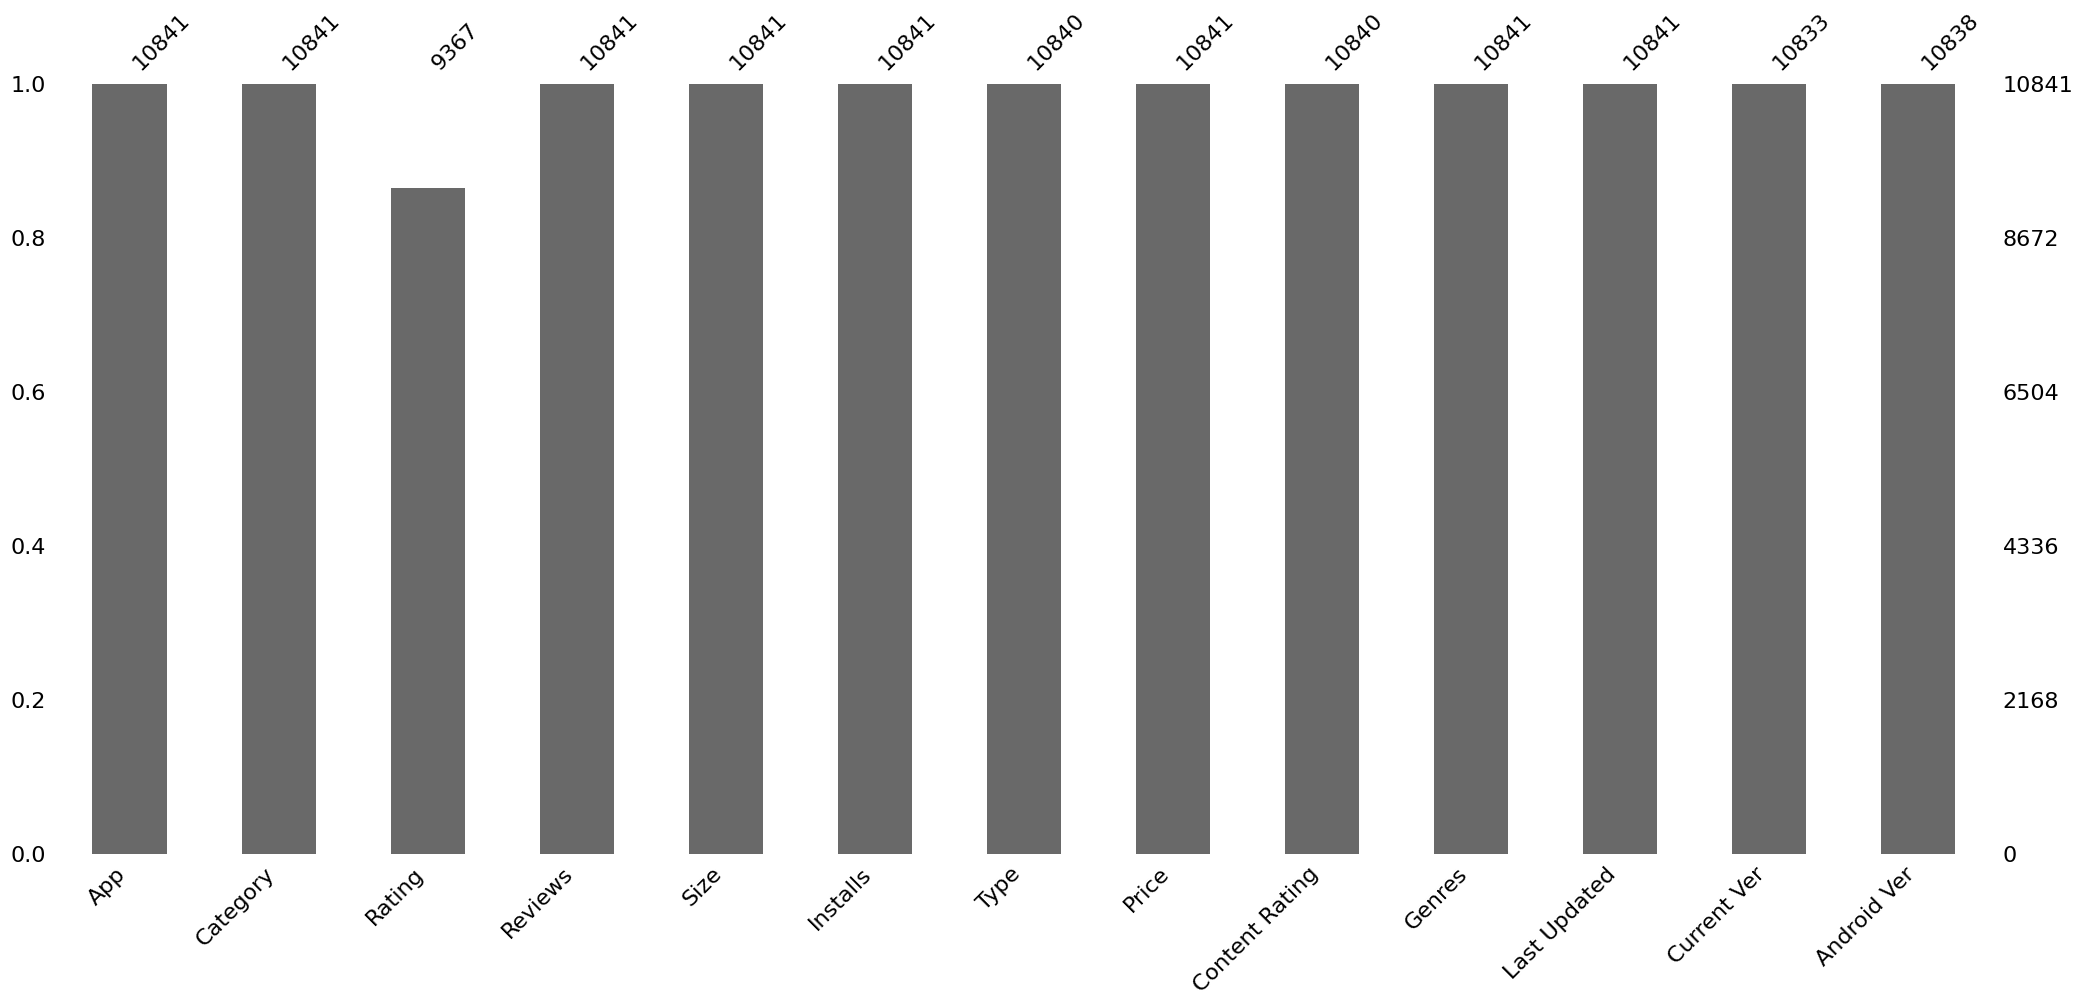

In [17]:
# Visualizing the missing values
msno.bar(ps_df)

In [18]:
# Missing Values/Null Values Count
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

<Axes: >

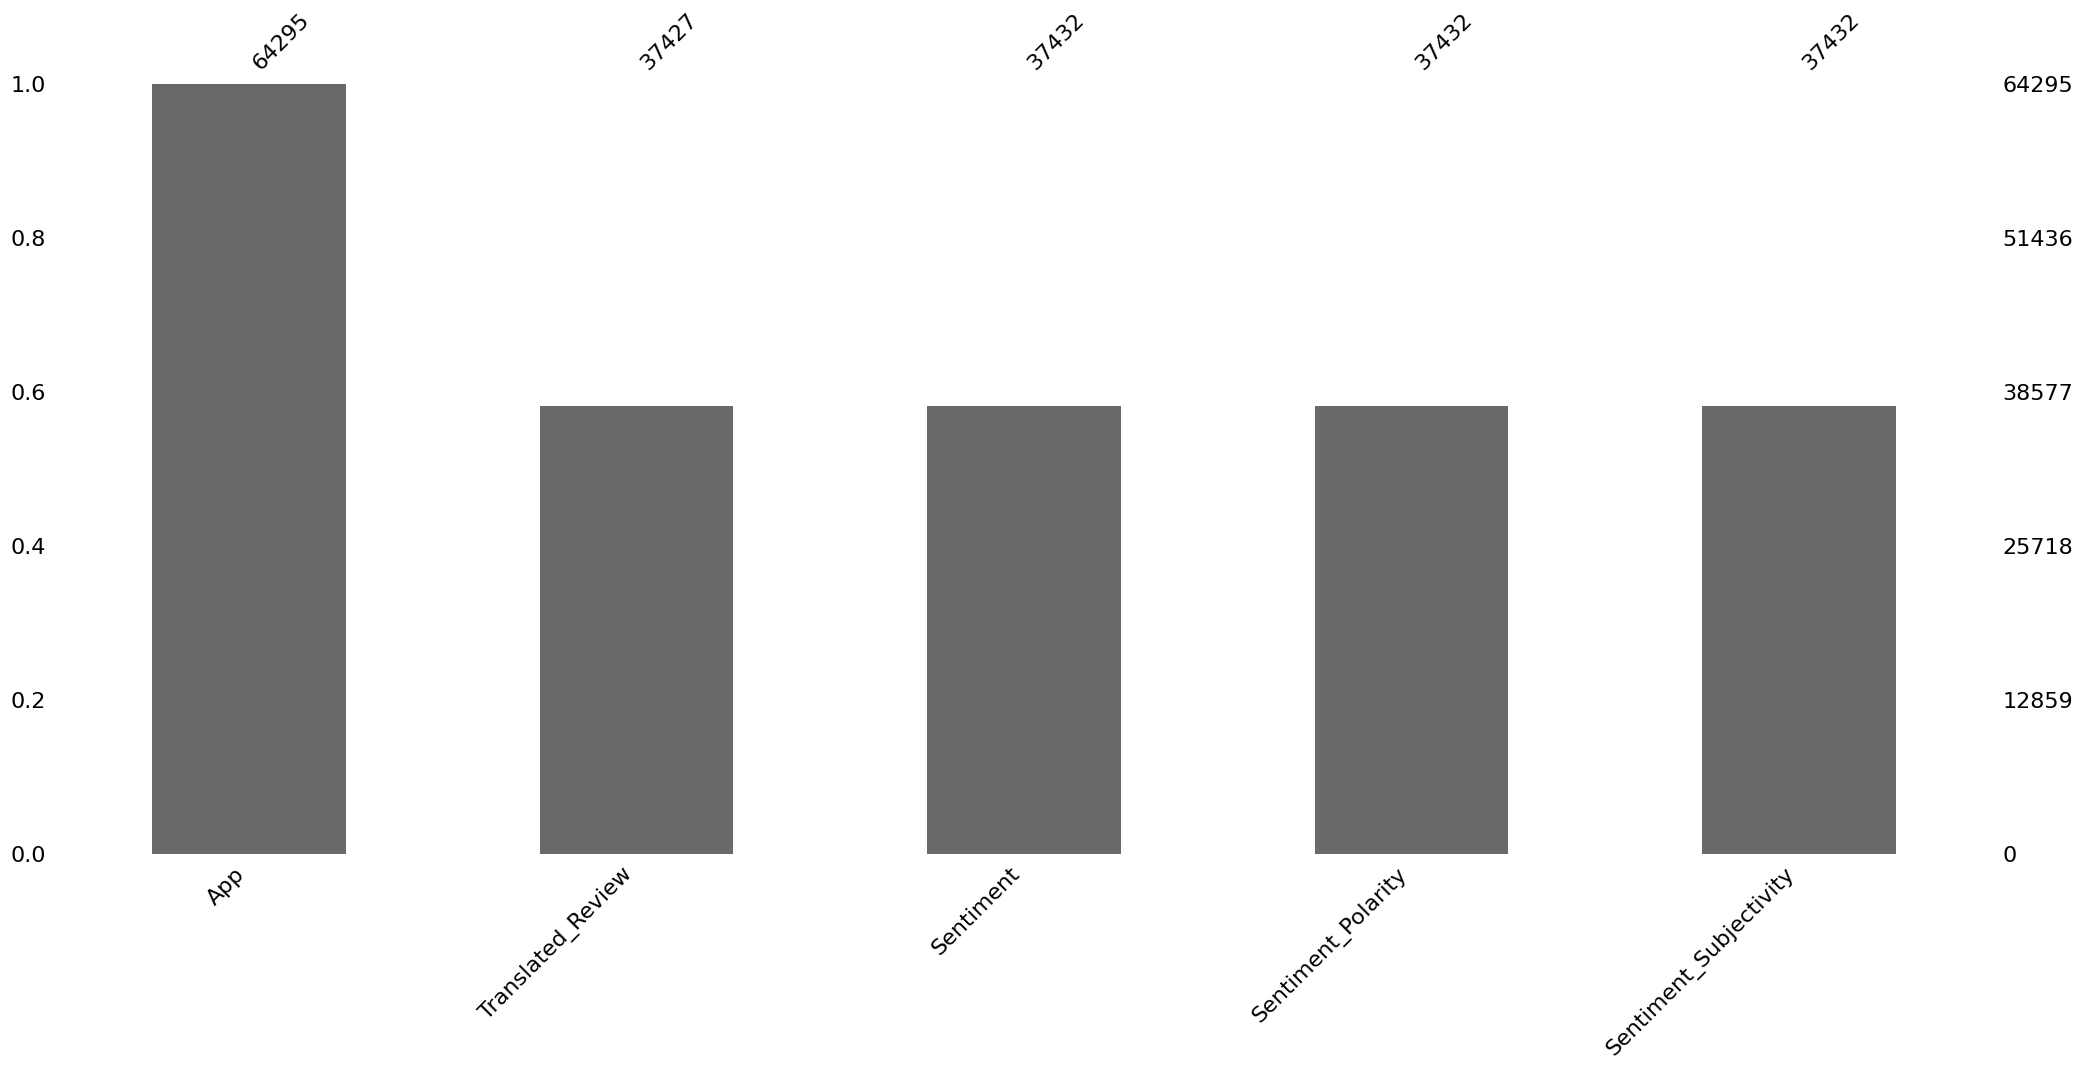

In [19]:
# Visualizing the missing values
msno.bar(ur_df)

### What did you know about your dataset?

There are two datasets and these given datasets belongs to the Play store, and we have to analyze key factors responsible for app engagement and success.

The goal is to analyze the data and draw insights that is leading to the app being a hit or a failure that in turn could help the developers while creating and listing new apps on the Playstore.

The Playstore dataset(ps_df) has 10841 Rows and 13 Columns. There are 1474 null values in Rating column, 1 null value each in Type and Content Rating column, 8 null values in current ver column and 3 null values in android ver column. Also, there are in total 483 duplicate values in the dataset.

The User Review dataset(ur_df) has 64295 Rows and 5 Columns. There are 26868 null values in Translated_Review column and 26863 null values each in Sentiment, Sentiment_Polarity and Sentiment_Subjectivity Columns.
Also, there are in total 33616 duplicate values in the dataset which is actually expected since the columns are mostly categorical in nature.

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [21]:
# Dataset Columns
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [22]:
# Dataset Describe
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [23]:
# Dataset Describe
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description

In Playsore dataset, variables are:-
*   **App :** Name of the apps available in the dataset
*   **Category :** Kind of App(Art and Design, Family etc)
*   **Rating :** Ratings given by the user to the particular app(1 to 5)
*   **Reviews :** Number of reviews of the users for the apps
*   **Size :** Size of the app(in M)
*    **Installs :** Number of times app installed
*   **Type :** Type of app(Free/Paid)
*   **Price :** Cost of the app(in $)
*   **Content Rating :** Suitability of app according to age(Teen,Everyone,etc)
*   **Genres :** More granular division of the kind of app
*   **Last Updated :** Date of App last updated
*   **Current Ver :** Current Version of the app
*   **Android Ver :** Android version of the phone compatible with the app

In User Review dataset, variables are:-
*   **App :** Name of the apps available in the dataset
*   **Translated_Review :** Review in another language translated to english
*   **Sentiment :** Overall sentiment of the app user(Positive/Negative/Neutral)
*   **Sentiment_Polarity :** Sentiment polarity refers to the degree of    
positivity or negativity of a review. It is often measured on a scale from -1 to +1, with -1 indicating very negative sentiment, +1 indicating very positive sentiment, and 0 indicating neutral sentiment.
*   **Sentiment_Subjectivity :** Sentiment subjectivity refers to the degree to which a review is subjective or objective. It is often measured on a scale from 0 to 1, with 0 indicating a completely objective review and 1 indicating a completely subjective review.







### Check Unique Values for each variable.

In [24]:
# Checking Unique Values for each variable.
for i in ps_df.columns.tolist():
  print("No. of unique values in ",i,"is",ps_df[i].nunique(),".")

No. of unique values in  App is 9660 .
No. of unique values in  Category is 34 .
No. of unique values in  Rating is 40 .
No. of unique values in  Reviews is 6002 .
No. of unique values in  Size is 462 .
No. of unique values in  Installs is 22 .
No. of unique values in  Type is 3 .
No. of unique values in  Price is 93 .
No. of unique values in  Content Rating is 6 .
No. of unique values in  Genres is 120 .
No. of unique values in  Last Updated is 1378 .
No. of unique values in  Current Ver is 2832 .
No. of unique values in  Android Ver is 33 .


In [25]:
# Checking Unique Values for each variable.
for i in ur_df.columns.tolist():
  print("No. of unique values in ",i,"is",ur_df[i].nunique(),".")

No. of unique values in  App is 1074 .
No. of unique values in  Translated_Review is 27994 .
No. of unique values in  Sentiment is 3 .
No. of unique values in  Sentiment_Polarity is 5410 .
No. of unique values in  Sentiment_Subjectivity is 4474 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [26]:
psdf=ps_df.drop_duplicates()

In [27]:
type(psdf)

pandas.core.frame.DataFrame

In [28]:
psdf.shape

(10358, 13)

In [29]:
# Grouped by 'App' in order to find out the counts of each app in the dataset.
# Ideally the occurence of each App in this dataset should be 1 but we can see that there are many apps occuring more than Once on this dataset.
psdf.groupby("App").size().reset_index(name='counts').sort_values(by = "counts", ascending=False)

,App,counts
7302,ROBLOX,9
101,8 Ball Pool,7
1800,Bubble Shooter,6
9290,Zombie Catchers,6
5148,Helix Jump,6
...,...,...
3280,Dine In CT - Food Delivery,1
3281,Dino Defends king 3 – Dinosaur T rex Hunter Games,1
3282,Dino T-Rex,1
3283,Dino War: Rise of Beasts,1


In [30]:
# showing 1 example - App Roblox occuring 9 times with almost all the parameters same.
# From our general understanding we know Roblox is a gaming app but due to some error it is shown in Family category also
# So, this is nothing but some error human error during this dataset preparation.
psdf[psdf['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [31]:
# Showing another example - App 8 Ball Pool occuring 7 times with all parameters same except Reviews which is fluctuating but negligibly.
psdf[psdf['App'] == '8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [32]:
# Filtering single row on the basis of maximum reviews by applying Rank() function.
psdf["rank"] = psdf.groupby("App")["Reviews"].rank(method="dense", ascending=False)
psdf = psdf[psdf['rank'] == 1.0]
psdf.head()

<ipython-input-32-ce40eaff1fca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psdf["rank"] = psdf.groupby("App")["Reviews"].rank(method="dense", ascending=False)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rank
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,1.0


In [33]:
# Outlier detected during dataset describe
psdf[psdf['Rating'] == 19.00]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rank
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,1.0


In [34]:
# Deleted row containing rating as 19.0 because max value of rating is 5.0
psdf.drop([10472], axis = 0, inplace = True)

In [35]:
psdf[psdf['Rating'] == 19.00]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rank


In [36]:
# Checking unique values for 'Price' column
psdf['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [37]:
# Removing '$' sign from the dataset(specifically from Price column)
psdf=psdf.replace('\$','',regex=True)

In [38]:
psdf['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '12.99',
       '2.49', '24.99', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [39]:
# Checking unique values for 'Installs' column
psdf['Installs'].unique()

array(['10,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '500,000+',
       '1,000,000,000+', '100,000,000+', '1,000+', '500,000,000+', '50+',
       '100+', '500+', '10+', '1+', '5+', '0+', '0'], dtype=object)

In [40]:
# Converting Installs column from string to int
psdf['Installs'] = psdf['Installs'].str.replace('\+', '').str.replace(',', '').astype(int)

<ipython-input-40-d013af5130f4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  psdf['Installs'] = psdf['Installs'].str.replace('\+', '').str.replace(',', '').astype(int)


In [41]:
psdf['Installs'].unique()

array([     10000,    5000000,   50000000,     100000,      50000,
          1000000,   10000000,       5000,     500000, 1000000000,
        100000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [42]:
# Creating a function which takes string as an argument and returns the original type
def convert_to_num(str):
  return eval(str)

In [43]:
# Converting Reviews column from string to int
psdf.loc[~psdf['Reviews'].isnull(), 'Reviews'] = psdf.loc[~psdf['Reviews'].isnull(), 'Reviews'].apply(convert_to_num)

<ipython-input-43-2a6b9b8feedc>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  psdf.loc[~psdf['Reviews'].isnull(), 'Reviews'] = psdf.loc[~psdf['Reviews'].isnull(), 'Reviews'].apply(convert_to_num)


In [44]:
psdf['Reviews'].unique()

array([   159,  87510, 215644, ...,    603,   1195, 398307])

In [45]:
# Conerting Price column from String to Float
psdf.loc[~psdf['Price'].isnull(),'Price'] = psdf.loc[~psdf['Price'].isnull(), 'Price'].apply(convert_to_num)

<ipython-input-45-85da9622074c>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  psdf.loc[~psdf['Price'].isnull(),'Price'] = psdf.loc[~psdf['Price'].isnull(), 'Price'].apply(convert_to_num)


In [46]:
# Earlier only 'Rating' column was Float type
# Now, converted other columns like 'Reviews', 'Installs',  and 'Price' to Int and Float type since it is required for futher analysis
psdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9665 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9665 non-null   object 
 1   Category        9665 non-null   object 
 2   Rating          8202 non-null   float64
 3   Reviews         9665 non-null   int64  
 4   Size            9665 non-null   object 
 5   Installs        9665 non-null   int64  
 6   Type            9664 non-null   object 
 7   Price           9665 non-null   float64
 8   Content Rating  9665 non-null   object 
 9   Genres          9665 non-null   object 
 10  Last Updated    9665 non-null   object 
 11  Current Ver     9657 non-null   object 
 12  Android Ver     9663 non-null   object 
 13  rank            9665 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [47]:
psdf.describe()

,Rating,Reviews,Installs,Price,rank
count,8202.000000,9.665000e+03,9.665000e+03,9665.000000,9665.0
mean,4.173226,2.165019e+05,7.779103e+06,1.099236,1.0
std,0.536385,1.830833e+06,5.374346e+07,16.847012,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000,1.0
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,1.0
50%,4.300000,9.690000e+02,1.000000e+05,0.000000,1.0
75%,4.500000,2.944500e+04,1.000000e+06,0.000000,1.0
max,5.000000,7.815831e+07,1.000000e+09,400.000000,1.0


In [ ]:
# Top 5 categories popular among users in terms of reviews
# Top app within the category popular among users in terms of reviews
# find top rated category
# find whether top rated category also has high no of reviews and higher no of installs
# check whether no. of installs is related to the type of app


In [48]:
# Top 10 most installed categories
psdf.groupby('Category').agg({'Installs':'mean'}).sort_values(by = 'Installs', ascending = False).reset_index().head(10)

,Category,Installs
0,COMMUNICATION,3.504215e+07
1,VIDEO_PLAYERS,2.397502e+07
2,SOCIAL,2.296179e+07
3,PHOTOGRAPHY,1.654501e+07
4,PRODUCTIVITY,1.548955e+07
5,GAME,1.419716e+07
6,TRAVEL_AND_LOCAL,1.321866e+07
7,ENTERTAINMENT,1.137540e+07
8,TOOLS,9.665587e+06
9,NEWS_AND_MAGAZINES,9.327629e+06


In [49]:
#4 Top Rated categories
psdf.groupby('Category').agg({'Rating':'mean'}).sort_values(by = 'Rating', ascending = False).reset_index().head(10)

,Category,Rating
0,EVENTS,4.435556
1,ART_AND_DESIGN,4.359322
2,EDUCATION,4.358879
3,BOOKS_AND_REFERENCE,4.344970
4,PERSONALIZATION,4.332215
5,PARENTING,4.300000
6,BEAUTY,4.278571
7,SOCIAL,4.247291
8,GAME,4.243527
9,WEATHER,4.243056


In [50]:
#1 Top 10 categories popular among users in terms of reviews
most_popular = psdf.groupby("Category")['Reviews'].sum().reset_index().sort_values(by = "Reviews", ascending= False).head(10)
most_popular
# giving preference to more no of reviews than better ratings and taking these categories for future analysis

,Category,Reviews
14,GAME,588992954
6,COMMUNICATION,285824082
29,TOOLS,229565063
27,SOCIAL,227936355
11,FAMILY,193696025
24,PHOTOGRAPHY,105352365
31,VIDEO_PLAYERS,67644444
25,PRODUCTIVITY,55590856
23,PERSONALIZATION,53543117
26,SHOPPING,44622473


<Axes: xlabel='Category', ylabel='Reviews'>

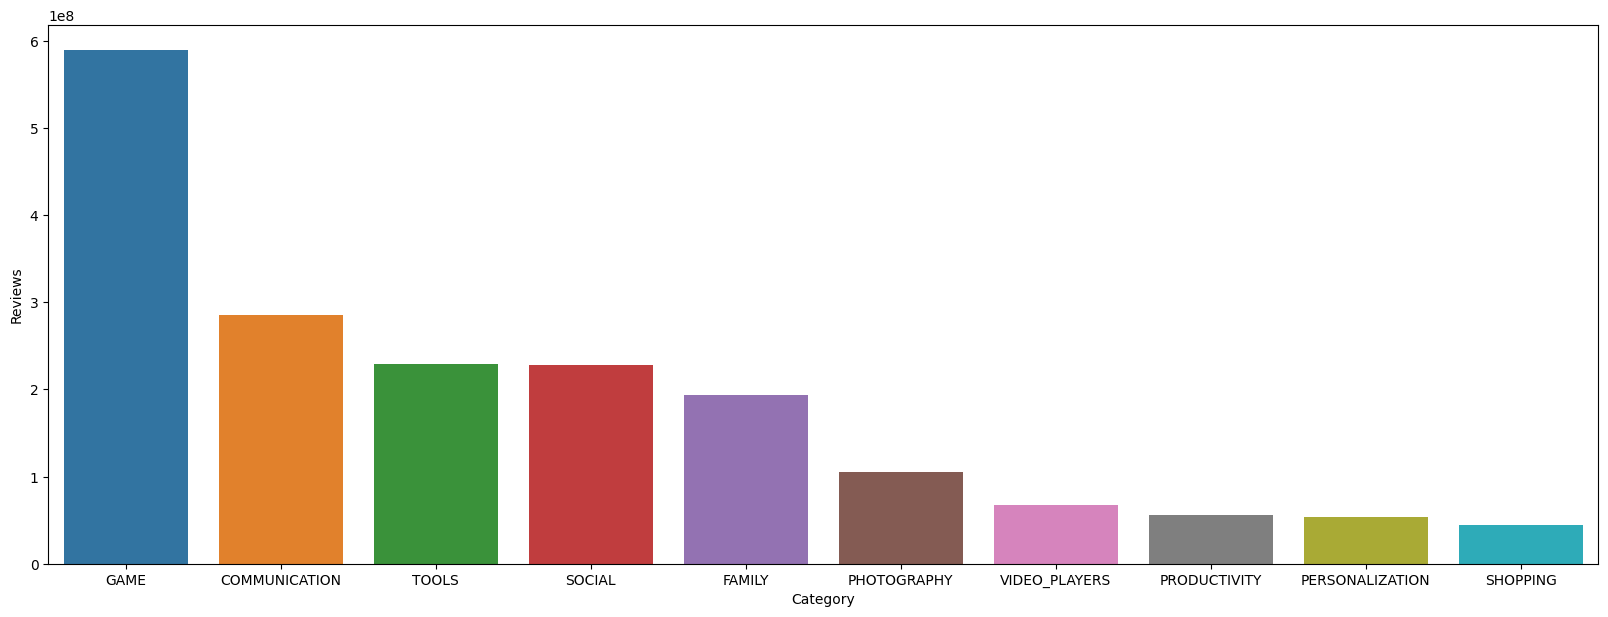

In [51]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Category',
            y = 'Reviews',
            data = most_popular)

### We can see that apps like Facebook, WhatsApp Messenger, Clash of Clans, Youtube, Twitter, etc are most popular in their respective categories.

In [55]:
#2 Most popular app of a particular category among users in terms of reviews
psdf_sorted = psdf[['Category','App','Reviews']].sort_values(by = 'Reviews', ascending = False).drop_duplicates(subset=['Category'])
psdf_sorted.head(10)

,Category,App,Reviews
2544,SOCIAL,Facebook,78158306
336,COMMUNICATION,WhatsApp Messenger,69119316
1879,GAME,Clash of Clans,44893888
4005,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526
3665,VIDEO_PLAYERS,YouTube,25655305
3739,NEWS_AND_MAGAZINES,Twitter,11667403
2884,PHOTOGRAPHY,Google Photos,10859051
2050,FAMILY,Minion Rush: Despicable Me Official Game,10216997
3223,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,9235373
4812,PERSONALIZATION,GO Launcher - 3D parallax Themes & HD Wallpapers,7464996


In [56]:
#3 Top 5 apps with most reviews in GAME Category
game = psdf[psdf['Category']=='GAME'].sort_values(by='Reviews', ascending=False).head(5)
game

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rank
1879,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,1.0
1872,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1.0
1878,Clash Royale,GAME,4.6,23136735,97M,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,1.0
1869,Candy Crush Saga,GAME,4.4,22430188,74M,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,1.0
1908,My Talking Tom,GAME,4.5,14892469,Varies with device,500000000,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,1.0


In [57]:
game_b5 = game[['App','Genres','Reviews']]
game_b5
# Strategy games are most popular in terms of reviews #3 done

,App,Genres,Reviews
1879,Clash of Clans,Strategy,44893888
1872,Subway Surfers,Arcade,27725352
1878,Clash Royale,Strategy,23136735
1869,Candy Crush Saga,Casual,22430188
1908,My Talking Tom,Casual,14892469


In [58]:
# Top 5 apps with most reviews in COMMUNICATION Category
comm = psdf[psdf['Category']=='COMMUNICATION'].sort_values(by='Reviews', ascending=False).head(5)
comm

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rank
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1.0
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up,1.0
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,Varies with device,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up,1.0
4676,Viber Messenger,COMMUNICATION,4.3,11335481,Varies with device,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device,1.0


In [59]:
comm_b5 = comm[['App','Genres','Reviews']]
comm_b5

,App,Genres,Reviews
336,WhatsApp Messenger,Communication,69119316
382,Messenger – Text and Video Chat for Free,Communication,56646578
420,UC Browser - Fast Download Private & Secure,Communication,17714850
6449,BBM - Free Calls & Messages,Communication,12843436
4676,Viber Messenger,Communication,11335481


In [60]:
# Top 5 apps with most reviews in TOOLS Category
tool = psdf[psdf['Category']=='TOOLS'].sort_values(by='Reviews', ascending=False).head(5)
tool

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rank
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,500000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,1.0
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device,1.0
4568,"360 Security - Free Antivirus, Booster, Cleaner",TOOLS,4.6,16771865,Varies with device,100000000,Free,0.0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device,1.0
8896,DU Battery Saver - Battery Charger & Battery Life,TOOLS,4.5,13479633,14M,100000000,Free,0.0,Everyone,Tools,"June 5, 2018",4.8.7.8,4.0 and up,1.0
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15M,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up,1.0


In [61]:
tool_b5 = tool[['App','Genres','Reviews']]
tool_b5

,App,Genres,Reviews
4005,Clean Master- Space Cleaner & Antivirus,Tools,42916526
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",Tools,24900999
4568,"360 Security - Free Antivirus, Booster, Cleaner",Tools,16771865
8896,DU Battery Saver - Battery Charger & Battery Life,Tools,13479633
8894,Cache Cleaner-DU Speed Booster (booster & clea...,Tools,12759815


In [62]:
# Top 5 apps with most reviews in SOCIAL Category
social = psdf[psdf['Category']=='SOCIAL'].sort_values(by='Reviews', ascending=False).head(5)
social

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rank
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.0
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1.0
2610,Snapchat,SOCIAL,4.0,17015352,Varies with device,500000000,Free,0.0,Teen,Social,"July 30, 2018",Varies with device,Varies with device,1.0
2546,Facebook Lite,SOCIAL,4.3,8606259,Varies with device,500000000,Free,0.0,Teen,Social,"August 1, 2018",Varies with device,Varies with device,1.0
6373,VK,SOCIAL,3.8,5793284,Varies with device,100000000,Free,0.0,Mature 17+,Social,"August 3, 2018",Varies with device,Varies with device,1.0


In [63]:
social_b5 = social[['App','Genres','Reviews']]
social_b5

,App,Genres,Reviews
2544,Facebook,Social,78158306
2604,Instagram,Social,66577446
2610,Snapchat,Social,17015352
2546,Facebook Lite,Social,8606259
6373,VK,Social,5793284


In [64]:
# Top 5 apps with most reviews in FAMILY Category
family = psdf[psdf['Category']=='FAMILY'].sort_values(by='Reviews', ascending=False).head(5)
family

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rank
2050,Minion Rush: Despicable Me Official Game,FAMILY,4.5,10216997,Varies with device,100000000,Free,0.0,Everyone 10+,Casual;Action & Adventure,"July 12, 2018",Varies with device,Varies with device,1.0
3975,Hay Day,FAMILY,4.5,10053186,94M,100000000,Free,0.0,Everyone,Casual,"June 28, 2018",1_39_93,4.0.3 and up,1.0
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71M,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up,1.0
5856,Google Play Games,FAMILY,4.3,7168735,Varies with device,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,1.0
8439,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,100000000,Free,0.0,Everyone,Education;Education,"August 6, 2018",Varies with device,Varies with device,1.0


In [65]:
family_b5 = family[['App','Genres','Reviews']]
family_b5
# Casual;Action & Adventure	is the most popular genre in FAMILY Category

,App,Genres,Reviews
2050,Minion Rush: Despicable Me Official Game,Casual;Action & Adventure,10216997
3975,Hay Day,Casual,10053186
10186,Farm Heroes Saga,Casual,7615646
5856,Google Play Games,Entertainment,7168735
8439,Duolingo: Learn Languages Free,Education;Education,6297590


In [67]:
#5 Free apps are more installed
psdf.groupby(['Category','Type']).Installs.sum().reset_index()
# We can see huge difference in number of installs between Free and Paid apps of same category.
# It is actually expected because people usually install and use Free apps mostly.


,Category,Type,Installs
0,ART_AND_DESIGN,Free,113222100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,53080061
3,AUTO_AND_VEHICLES,Paid,50150
4,BEAUTY,Free,27197050
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,183060
59,VIDEO_PLAYERS,Free,3931831720
60,VIDEO_PLAYERS,Paid,71000
61,WEATHER,Free,360288520


### High Corelation between no. of Reviews and no. of Installs

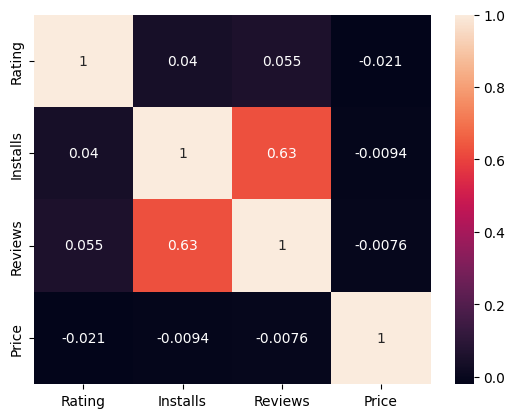

In [68]:
hm = sns.heatmap(psdf[['Rating', 'Installs', 'Reviews', 'Price']].corr(), annot=True)
# we can see that the corelation between Rating and Installs is minutely related. So, we can say Rating of an app is Independent of Installs

In [69]:
# ~ 42% of the records have null values in ur_df
#df1.shape
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [70]:
ur_df.shape

(64295, 5)

In [71]:
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [72]:
# Dropping rows containing null values because mostly categorical columns are present in this dataset.
urdf = ur_df.dropna()
urdf

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [73]:
urdf.shape

(37427, 5)

In [74]:
urdf.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [75]:
urdf1 = urdf.copy()

In [76]:
urdf1=urdf.groupby(['App']).agg({'Sentiment_Polarity':'mean','Sentiment_Subjectivity':'mean'}).reset_index()
urdf1

,App,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,0.470733,0.495455
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
2,11st,0.185943,0.455340
3,1800 Contacts - Lens Store,0.318145,0.591098
4,1LINE – One Line with One Touch,0.196290,0.557315
...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,0.101622,0.545444
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
862,Hotstar,0.038178,0.493964
863,Hotwire Hotel & Car Rental App,0.187029,0.459717


In [77]:
#Sentiment count for apps
urdf2 = urdf.groupby('App')['Sentiment'].value_counts().unstack().fillna(0).sort_values(by = 'Positive', ascending = False)
urdf2

Sentiment,Negative,Neutral,Positive
App,,,
Helix Jump,58.0,6.0,209.0
Duolingo: Learn Languages Free,34.0,6.0,200.0
Calorie Counter - Macros,20.0,6.0,174.0
Bowmasters,119.0,24.0,169.0
Calorie Counter - MyFitnessPal,52.0,33.0,169.0
...,...,...,...
Free Live Talk-Video Call,1.0,0.0,0.0
DEER HUNTER 2018,3.0,0.0,0.0
Google Street View,3.0,1.0,0.0


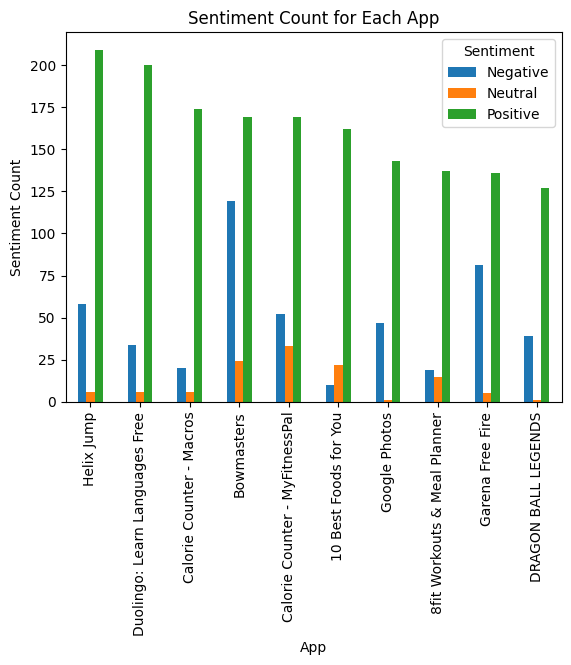

In [78]:
urdf2.head(10).plot(kind='bar', stacked=False)
plt.xlabel('App')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Count for Each App')
plt.legend(title='Sentiment')
plt.show()


In [79]:
# Adding a column named 'Total'
urdf2['Total'] = urdf2['Positive']+urdf2['Neutral']+urdf2['Negative']

In [80]:
# Adding a column named 'Positive_Percentage'
urdf2['Positive_Percentage'] = round((urdf2['Positive']/(urdf2['Positive']+urdf2['Neutral']+urdf2['Negative']))*100,1)

In [81]:
# Sorting with Total and Positive Percentage
urdf2.sort_values(by = ['Total','Positive_Percentage'], ascending = False).head(10)

Sentiment,Negative,Neutral,Positive,Total,Positive_Percentage
App,,,,,
Bowmasters,119.0,24.0,169.0,312.0,54.2
Helix Jump,58.0,6.0,209.0,273.0,76.6
Angry Birds Classic,147.0,2.0,124.0,273.0,45.4
Calorie Counter - MyFitnessPal,52.0,33.0,169.0,254.0,66.5
Duolingo: Learn Languages Free,34.0,6.0,200.0,240.0,83.3
Candy Crush Saga,126.0,12.0,102.0,240.0,42.5
Garena Free Fire,81.0,5.0,136.0,222.0,61.3
8 Ball Pool,106.0,9.0,104.0,219.0,47.5
Calorie Counter - Macros,20.0,6.0,174.0,200.0,87.0


In [82]:
urdf_new = pd.merge(urdf1, urdf2, on='App')
urdf_new

,App,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
0,10 Best Foods for You,0.470733,0.495455,10.0,22.0,162.0,194.0,83.5
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516,1.0,8.0,31.0,40.0,77.5
2,11st,0.185943,0.455340,7.0,9.0,23.0,39.0,59.0
3,1800 Contacts - Lens Store,0.318145,0.591098,6.0,10.0,64.0,80.0,80.0
4,1LINE – One Line with One Touch,0.196290,0.557315,8.0,3.0,27.0,38.0,71.1
...,...,...,...,...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,0.101622,0.545444,21.0,8.0,39.0,68.0,57.4
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284,3.0,14.0,17.0,34.0,50.0
862,Hotstar,0.038178,0.493964,14.0,4.0,14.0,32.0,43.8
863,Hotwire Hotel & Car Rental App,0.187029,0.459717,6.0,11.0,16.0,33.0,48.5


In [83]:
urdf_new.sort_values(by = ['Total','Positive_Percentage'], ascending = False).head(10)

,App,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
256,Bowmasters,0.061415,0.500548,119.0,24.0,169.0,312.0,54.2
817,Helix Jump,0.099665,0.487221,58.0,6.0,209.0,273.0,76.6
114,Angry Birds Classic,-0.007537,0.534886,147.0,2.0,124.0,273.0,45.4
328,Calorie Counter - MyFitnessPal,0.216523,0.474814,52.0,33.0,169.0,254.0,66.5
510,Duolingo: Learn Languages Free,0.200408,0.470215,34.0,6.0,200.0,240.0,83.3
334,Candy Crush Saga,0.031068,0.456293,126.0,12.0,102.0,240.0,42.5
718,Garena Free Fire,0.071158,0.494133,81.0,5.0,136.0,222.0,61.3
22,8 Ball Pool,0.001252,0.491352,106.0,9.0,104.0,219.0,47.5
327,Calorie Counter - Macros,0.247519,0.512675,20.0,6.0,174.0,200.0,87.0
0,10 Best Foods for You,0.470733,0.495455,10.0,22.0,162.0,194.0,83.5


In [84]:
# Inner Join
df1 = pd.merge(psdf, urdf_new, on = 'App')
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver,Android Ver,rank,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
0,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,...,2.9.2,3.0 and up,1.0,0.268483,0.523447,10.0,16.0,64.0,90.0,71.1
1,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,5000000,Free,0.0,Everyone,Art & Design,...,2.2.5,4.0.3 and up,1.0,0.412649,0.679226,0.0,0.0,4.0,4.0,100.0
2,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,100000,Free,0.0,Everyone,Art & Design,...,1.1,4.0.3 and up,1.0,0.283509,0.479298,5.0,10.0,23.0,38.0,60.5
3,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,500000,Free,0.0,Everyone,Art & Design;Creativity,...,1.0.8,4.0.3 and up,1.0,0.171836,0.572762,8.0,1.0,29.0,38.0,76.3
4,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6.1M,100000,Free,0.0,Everyone,Art & Design,...,1.03,4.0.3 and up,1.0,0.291857,0.546365,4.0,10.0,21.0,35.0,60.0


In [85]:
df1 = df1.drop(['Last Updated', 'Current Ver', 'Android Ver', 'Price', 'rank'], axis = 1)
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
0,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,Everyone,Art & Design,0.268483,0.523447,10.0,16.0,64.0,90.0,71.1
1,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,5000000,Free,Everyone,Art & Design,0.412649,0.679226,0.0,0.0,4.0,4.0,100.0
2,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,100000,Free,Everyone,Art & Design,0.283509,0.479298,5.0,10.0,23.0,38.0,60.5
3,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,500000,Free,Everyone,Art & Design;Creativity,0.171836,0.572762,8.0,1.0,29.0,38.0,76.3
4,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6.1M,100000,Free,Everyone,Art & Design,0.291857,0.546365,4.0,10.0,21.0,35.0,60.0


In [86]:
df1.sort_values(by = ['Total','Positive_Percentage'], ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
359,Bowmasters,GAME,4.7,1536349,Varies with device,50000000,Free,Teen,Action,0.061415,0.500548,119.0,24.0,169.0,312.0,54.2
329,Helix Jump,GAME,4.2,1500999,33M,100000000,Free,Everyone,Action,0.099665,0.487221,58.0,6.0,209.0,273.0,76.6
354,Angry Birds Classic,GAME,4.4,5566908,97M,100000000,Free,Everyone,Arcade,-0.007537,0.534886,147.0,2.0,124.0,273.0,45.4
227,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873523,Varies with device,50000000,Free,Everyone,Health & Fitness,0.216523,0.474814,52.0,33.0,169.0,254.0,66.5
784,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,100000000,Free,Everyone,Education;Education,0.200408,0.470215,34.0,6.0,200.0,240.0,83.3
313,Candy Crush Saga,GAME,4.4,22430188,74M,500000000,Free,Everyone,Casual,0.031068,0.456293,126.0,12.0,102.0,240.0,42.5
814,Garena Free Fire,GAME,4.5,5534114,53M,100000000,Free,Teen,Action,0.071158,0.494133,81.0,5.0,136.0,222.0,61.3
314,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,Everyone,Sports,0.001252,0.491352,106.0,9.0,104.0,219.0,47.5
232,Calorie Counter - Macros,HEALTH_AND_FITNESS,4.0,3061,5.5M,100000,Free,Everyone,Health & Fitness,0.247519,0.512675,20.0,6.0,174.0,200.0,87.0
231,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,Everyone 10+,Health & Fitness,0.470733,0.495455,10.0,22.0,162.0,194.0,83.5


In [87]:
#1 Top 10 categories popular among users in terms of reviews
top_category = psdf.groupby("Category")['Reviews'].sum().reset_index().sort_values(by = "Reviews", ascending= False).head(10)
top_category
# giving preference to more no of reviews than better ratings and taking these categories for future analysis

,Category,Reviews
14,GAME,588992954
6,COMMUNICATION,285824082
29,TOOLS,229565063
27,SOCIAL,227936355
11,FAMILY,193696025
24,PHOTOGRAPHY,105352365
31,VIDEO_PLAYERS,67644444
25,PRODUCTIVITY,55590856
23,PERSONALIZATION,53543117
26,SHOPPING,44622473


In [88]:
# Top 5 apps with most reviews in GAME Category
g = df1[df1['Category']=='GAME'].sort_values(by='Reviews', ascending=False).head(5)
g

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
317,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,Everyone 10+,Strategy,0.036756,0.533956,10.0,0.0,23.0,33.0,69.7
316,Clash Royale,GAME,4.6,23136735,97M,100000000,Free,Everyone 10+,Strategy,0.069157,0.489236,58.0,0.0,107.0,165.0,64.8
313,Candy Crush Saga,GAME,4.4,22430188,74M,500000000,Free,Everyone,Casual,0.031068,0.456293,126.0,12.0,102.0,240.0,42.5
314,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,Everyone,Sports,0.001252,0.491352,106.0,9.0,104.0,219.0,47.5
326,Dream League Soccer 2018,GAME,4.6,9883806,74M,100000000,Free,Everyone,Sports,-0.000518,0.483124,1.0,0.0,2.0,3.0,66.7


In [94]:
# Top 5 apps in GAME Category sorted by Total no of Sentiments and Positive_Percentage of sentiments
g5 = df1[df1['Category']=='GAME'].sort_values(by=['Total','Positive_Percentage'], ascending=False).head(5)
g5

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
359,Bowmasters,GAME,4.7,1536349,Varies with device,50000000,Free,Teen,Action,0.061415,0.500548,119.0,24.0,169.0,312.0,54.2
329,Helix Jump,GAME,4.2,1500999,33M,100000000,Free,Everyone,Action,0.099665,0.487221,58.0,6.0,209.0,273.0,76.6
354,Angry Birds Classic,GAME,4.4,5566908,97M,100000000,Free,Everyone,Arcade,-0.007537,0.534886,147.0,2.0,124.0,273.0,45.4
313,Candy Crush Saga,GAME,4.4,22430188,74M,500000000,Free,Everyone,Casual,0.031068,0.456293,126.0,12.0,102.0,240.0,42.5
814,Garena Free Fire,GAME,4.5,5534114,53M,100000000,Free,Teen,Action,0.071158,0.494133,81.0,5.0,136.0,222.0,61.3


In [95]:
# Top 5 apps with most reviews in COMM Category
c = df1[df1['Category']=='COMMUNICATION'].sort_values(by='Reviews', ascending=False).head(5)
c

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
765,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,Varies with device,100000000,Free,Everyone,Communication,0.154423,0.461890,8.0,9.0,18.0,35.0,51.4
73,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1000000000,Free,Everyone,Communication,0.071383,0.465920,22.0,9.0,33.0,64.0,51.6
76,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,1000000000,Free,Everyone,Communication,0.251503,0.531249,12.0,16.0,86.0,114.0,75.4
64,Firefox Browser fast & private,COMMUNICATION,4.4,3075118,Varies with device,100000000,Free,Everyone,Communication,0.110142,0.518786,17.0,0.0,45.0,62.0,72.6
61,"GO SMS Pro - Messenger, Free Themes, Emoji",COMMUNICATION,4.4,2876500,24M,100000000,Free,Everyone,Communication,0.202488,0.439832,4.0,9.0,13.0,26.0,50.0


In [96]:
# Top 5 apps in COMMUNICATION Category sorted by Total no of Sentiments and Positive_Percentage of sentiments
c5 = df1[df1['Category']=='COMMUNICATION'].sort_values(by=['Total','Positive_Percentage'], ascending=False).head(5)
c5

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
76,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,1000000000,Free,Everyone,Communication,0.251503,0.531249,12.0,16.0,86.0,114.0,75.4
737,Azar,COMMUNICATION,4.2,1092337,Varies with device,50000000,Free,Mature 17+,Communication,0.068404,0.481706,25.0,29.0,38.0,92.0,41.3
816,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,Everyone,Communication,0.209249,0.553828,4.0,6.0,54.0,64.0,84.4
73,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1000000000,Free,Everyone,Communication,0.071383,0.465920,22.0,9.0,33.0,64.0,51.6
64,Firefox Browser fast & private,COMMUNICATION,4.4,3075118,Varies with device,100000000,Free,Everyone,Communication,0.110142,0.518786,17.0,0.0,45.0,62.0,72.6


In [97]:
# Top 5 apps with most reviews in TOOLS Category
t = df1[df1['Category']=='TOOLS'].sort_values(by='Reviews', ascending=False).head(5)
t

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
791,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15M,100000000,Free,Everyone,Tools,0.278521,0.457077,2.0,8.0,16.0,26.0,61.5
564,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,Everyone,Tools,0.260359,0.492744,3.0,7.0,28.0,38.0,73.7
565,Google Translate,TOOLS,4.4,5745093,Varies with device,500000000,Free,Everyone,Tools,0.214167,0.490000,0.0,0.0,2.0,2.0,100.0
760,AppLock,TOOLS,4.4,4931562,Varies with device,100000000,Free,Everyone,Tools,0.016233,0.499941,7.0,0.0,6.0,13.0,46.2
604,"GO Keyboard - Cute Emojis, Themes and GIFs",TOOLS,4.5,4594198,Varies with device,100000000,Free,Everyone,Tools,0.223901,0.310613,1.0,13.0,15.0,29.0,51.7


In [98]:
# Top 5 apps in TOOLS Category sorted by Total no of Sentiments and Positive_Percentage of sentiments
t5 = df1[df1['Category']=='TOOLS'].sort_values(by=['Total','Positive_Percentage'], ascending=False).head(5)
t5

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
606,CM Locker - Security Lockscreen,TOOLS,4.6,3090727,Varies with device,100000000,Free,Everyone,Tools,0.240055,0.480304,15.0,15.0,56.0,86.0,65.1
595,Graphing Calculator,TOOLS,3.9,12388,5.3M,1000000,Free,Everyone,Tools,0.245830,0.464479,13.0,14.0,52.0,79.0,65.8
574,Gboard - the Google Keyboard,TOOLS,4.2,1859115,Varies with device,500000000,Free,Everyone,Tools,0.064587,0.517172,34.0,2.0,40.0,76.0,52.6
580,Digital Alarm Clock,TOOLS,4.2,118439,16M,10000000,Free,Everyone,Tools,0.341073,0.480795,5.0,7.0,59.0,71.0,83.1
600,Fast Secure VPN,TOOLS,4.3,56848,9.6M,1000000,Free,Everyone,Tools,0.179100,0.418541,11.0,23.0,37.0,71.0,52.1


In [104]:
# Top 5 apps with most reviews in SOCIAL Category
s = df1[df1['Category']=='SOCIAL'].sort_values(by='Reviews', ascending=False).head(5)
s

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
434,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,Teen,Social,-0.007003,0.460207,60.0,19.0,53.0,132.0,40.2
435,Facebook Lite,SOCIAL,4.3,8606259,Varies with device,500000000,Free,Teen,Social,-0.000991,0.456127,14.0,3.0,12.0,29.0,41.4
436,Google+,SOCIAL,4.2,4831125,Varies with device,1000000000,Free,Teen,Social,0.368056,0.469444,0.0,0.0,2.0,2.0,100.0
441,Badoo - Free Chat & Dating App,SOCIAL,4.3,3781770,Varies with device,100000000,Free,Mature 17+,Social,0.128489,0.416103,27.0,35.0,58.0,120.0,48.3
803,Amino: Communities and Chats,SOCIAL,4.8,1264084,62M,10000000,Free,Teen,Social,0.047590,0.537536,12.0,0.0,23.0,35.0,65.7


In [105]:
# Top 5 apps in SOCIAL Category sorted by Total no of Sentiments and Positive_Percentage of sentiments
s5 = df1[df1['Category']=='SOCIAL'].sort_values(by=['Total','Positive_Percentage'], ascending=False).head(5)
s5

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
434,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,Teen,Social,-0.007003,0.460207,60.0,19.0,53.0,132.0,40.2
441,Badoo - Free Chat & Dating App,SOCIAL,4.3,3781770,Varies with device,100000000,Free,Mature 17+,Social,0.128489,0.416103,27.0,35.0,58.0,120.0,48.3
445,Banjo,SOCIAL,4.2,58341,9.3M,1000000,Free,Everyone,Social,0.230850,0.464122,6.0,6.0,27.0,39.0,69.2
443,Bloglovin',SOCIAL,3.9,8936,Varies with device,500000,Free,Everyone,Social,0.133953,0.469378,7.0,13.0,19.0,39.0,48.7
439,HTC Social Plugin - Facebook,SOCIAL,3.6,13223,2.8M,10000000,Free,Mature 17+,Social,-0.051705,0.494052,20.0,5.0,14.0,39.0,35.9


In [101]:
# Top 5 apps with most reviews in FAMILY Category
f = df1[df1['Category']=='FAMILY'].sort_values(by='Reviews', ascending=False).head(5)
f

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
750,Hay Day,FAMILY,4.5,10053186,94M,100000000,Free,Everyone,Casual,0.019572,0.503682,24.0,3.0,34.0,61.0,55.7
810,Farm Heroes Saga,FAMILY,4.4,7615646,71M,100000000,Free,Everyone,Casual,-0.011811,0.444434,43.0,21.0,46.0,110.0,41.8
784,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,100000000,Free,Everyone,Education;Education,0.200408,0.470215,34.0,6.0,200.0,240.0,83.3
811,Fallout Shelter,FAMILY,4.6,2721923,25M,10000000,Free,Teen,Simulation,0.170232,0.513606,4.0,1.0,27.0,32.0,84.4
798,Episode - Choose Your Story,FAMILY,4.3,1842381,Varies with device,50000000,Free,Teen,Simulation,0.080274,0.481147,48.0,18.0,94.0,160.0,58.8


In [106]:
# Top 5 apps in FAMILY Category sorted by Total no of Sentiments and Positive_Percentage of sentiments
f5 = df1[df1['Category']=='FAMILY'].sort_values(by=['Total','Positive_Percentage'], ascending=False).head(5)
f5

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive,Total,Positive_Percentage
784,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,100000000,Free,Everyone,Education;Education,0.200408,0.470215,34.0,6.0,200.0,240.0,83.3
798,Episode - Choose Your Story,FAMILY,4.3,1842381,Varies with device,50000000,Free,Teen,Simulation,0.080274,0.481147,48.0,18.0,94.0,160.0,58.8
370,Bubble Shooter,FAMILY,4.4,59843,20M,5000000,Free,Everyone,Puzzle;Brain Games,0.253676,0.515660,40.0,5.0,100.0,145.0,69.0
810,Farm Heroes Saga,FAMILY,4.4,7615646,71M,100000000,Free,Everyone,Casual,-0.011811,0.444434,43.0,21.0,46.0,110.0,41.8
780,DC Super Hero Girls™,FAMILY,4.3,43090,95M,5000000,Free,Everyone,Action;Action & Adventure,0.334009,0.573327,9.0,3.0,90.0,102.0,88.2


In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***